# Downloading QUANDL package

### As data is taken from quandl package

In [1]:
pip install quandl

# imports needed for project

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from datetime import date, datetime
import datetime as dt
import numpy as np
import quandl

# Loading downloading data from quandl and loading it into _`data`_ dataFrame


In [3]:
data = quandl.get("WIKI/GOOGL", start_date="2004-08-19", end_date="2017-11-04")

# Displaying the dataFrame



In [4]:
data

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2004-08-19,100.01,104.06,95.96,100.335,44659000.0,0.0,1.0,50.159839,52.191109,48.128568,50.322842,44659000.0
2004-08-20,101.01,109.08,100.50,108.310,22834300.0,0.0,1.0,50.661387,54.708881,50.405597,54.322689,22834300.0
2004-08-23,110.76,113.48,109.05,109.400,18256100.0,0.0,1.0,55.551482,56.915693,54.693835,54.869377,18256100.0
2004-08-24,111.24,111.60,103.57,104.870,15247300.0,0.0,1.0,55.792225,55.972783,51.945350,52.597363,15247300.0
2004-08-25,104.76,108.00,103.88,106.000,9188600.0,0.0,1.0,52.542193,54.167209,52.100830,53.164113,9188600.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2017-10-30,1029.16,1039.83,1022.33,1033.130,2245352.0,0.0,1.0,1029.160000,1039.830000,1022.330000,1033.130000,2245352.0
2017-10-31,1033.00,1041.00,1026.30,1033.040,1490660.0,0.0,1.0,1033.000000,1041.000000,1026.300000,1033.040000,1490660.0
2017-11-01,1036.32,1047.86,1034.00,1042.600,2105729.0,0.0,1.0,1036.320000,1047.860000,1034.000000,1042.600000,2105729.0


In [5]:
data.index

DatetimeIndex(['2004-08-19', '2004-08-20', '2004-08-23', '2004-08-24',
               '2004-08-25', '2004-08-26', '2004-08-27', '2004-08-30',
               '2004-08-31', '2004-09-01',
               ...
               '2017-10-23', '2017-10-24', '2017-10-25', '2017-10-26',
               '2017-10-27', '2017-10-30', '2017-10-31', '2017-11-01',
               '2017-11-02', '2017-11-03'],
              dtype='datetime64[ns]', name='Date', length=3328, freq=None)

# Creating 2 columns derived from other columns

$$HL-PCT = \frac{(Adj. High - Adj. Low) * 100}{Adj.Close}$$

$$PCT-change = \frac{(Adj. Close - Adj. Open) * 100}{Adj.Open}$$



In [6]:
data['HL_PCT'] = (data['Adj. High'] - data['Adj. Low']) * 100 / data['Adj. Close']
data['PCT_change'] = (data['Adj. Close'] - data['Adj. Open']) * 100 / data['Adj. Open']

In [7]:
data

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,HL_PCT,PCT_change
Date,,,,,,,,,,,,,,
2004-08-19,100.01,104.06,95.96,100.335,44659000.0,0.0,1.0,50.159839,52.191109,48.128568,50.322842,44659000.0,8.072956,0.324968
2004-08-20,101.01,109.08,100.50,108.310,22834300.0,0.0,1.0,50.661387,54.708881,50.405597,54.322689,22834300.0,7.921706,7.227007
2004-08-23,110.76,113.48,109.05,109.400,18256100.0,0.0,1.0,55.551482,56.915693,54.693835,54.869377,18256100.0,4.049360,-1.227880
2004-08-24,111.24,111.60,103.57,104.870,15247300.0,0.0,1.0,55.792225,55.972783,51.945350,52.597363,15247300.0,7.657099,-5.726357
2004-08-25,104.76,108.00,103.88,106.000,9188600.0,0.0,1.0,52.542193,54.167209,52.100830,53.164113,9188600.0,3.886792,1.183658
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-10-30,1029.16,1039.83,1022.33,1033.130,2245352.0,0.0,1.0,1029.160000,1039.830000,1022.330000,1033.130000,2245352.0,1.693882,0.385751
2017-10-31,1033.00,1041.00,1026.30,1033.040,1490660.0,0.0,1.0,1033.000000,1041.000000,1026.300000,1033.040000,1490660.0,1.422985,0.003872
2017-11-01,1036.32,1047.86,1034.00,1042.600,2105729.0,0.0,1.0,1036.320000,1047.860000,1034.000000,1042.600000,2105729.0,1.329369,0.605990


### Droping the rows with value as _`NA`_

In [8]:
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3328 entries, 2004-08-19 to 2017-11-03
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Open         3328 non-null   float64
 1   High         3328 non-null   float64
 2   Low          3328 non-null   float64
 3   Close        3328 non-null   float64
 4   Volume       3328 non-null   float64
 5   Ex-Dividend  3328 non-null   float64
 6   Split Ratio  3328 non-null   float64
 7   Adj. Open    3328 non-null   float64
 8   Adj. High    3328 non-null   float64
 9   Adj. Low     3328 non-null   float64
 10  Adj. Close   3328 non-null   float64
 11  Adj. Volume  3328 non-null   float64
 12  HL_PCT       3328 non-null   float64
 13  PCT_change   3328 non-null   float64
dtypes: float64(14)
memory usage: 390.0 KB


In [9]:
data.describe()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,HL_PCT,PCT_change
count,3328.000000,3328.000000,3328.000000,3328.000000,3.328000e+03,3328.000000,3328.0,3328.000000,3328.000000,3328.000000,3328.000000,3.328000e+03,3328.000000,3328.000000
mean,582.391438,587.720427,576.511613,582.163453,7.991612e+06,0.170665,1.0,389.605064,393.002154,385.821252,389.465735,7.991612e+06,2.130692,-0.023296
std,213.879520,214.478805,212.983385,213.824112,8.301048e+06,9.845437,0.0,233.691782,234.919666,232.200606,233.679363,8.301048e+06,1.401155,1.506710
min,99.090000,101.740000,95.960000,100.010000,5.211410e+05,0.000000,1.0,49.698414,51.027517,48.128568,50.159839,5.211410e+05,0.385989,-9.179757
25%,456.975000,461.337500,451.897500,456.597500,2.600092e+06,0.000000,1.0,229.195003,231.383007,226.648392,229.005669,2.600092e+06,1.245129,-0.753662
50%,560.165000,564.935000,554.115000,559.395000,5.238500e+06,0.000000,1.0,296.482714,298.614294,293.962434,296.249494,5.238500e+06,1.759274,-0.016755
75%,714.012500,721.047500,705.395000,713.750000,1.048388e+07,0.000000,1.0,549.742500,553.485000,545.122500,549.202500,1.048388e+07,2.544589,0.752679
max,1226.800000,1228.880000,1218.600000,1220.170000,8.215110e+07,567.971668,1.0,1042.750000,1063.620000,1037.650000,1049.990000,8.215110e+07,16.278749,8.759770


In [10]:
df = pd.DataFrame(data, columns=['Close'])

In [11]:
df['Date'] = df.index

In [12]:
for i in range(len(df['Date'])):
  df['Date'].iloc[i] = str(df['Date'].iloc[i])[:10]

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [13]:
df.isna().values.any()

False

In [14]:
df.set_index([pd.Index(np.arange(0,3328))], inplace=True)

# Plotting the Graph of Date vs Closing value of stock

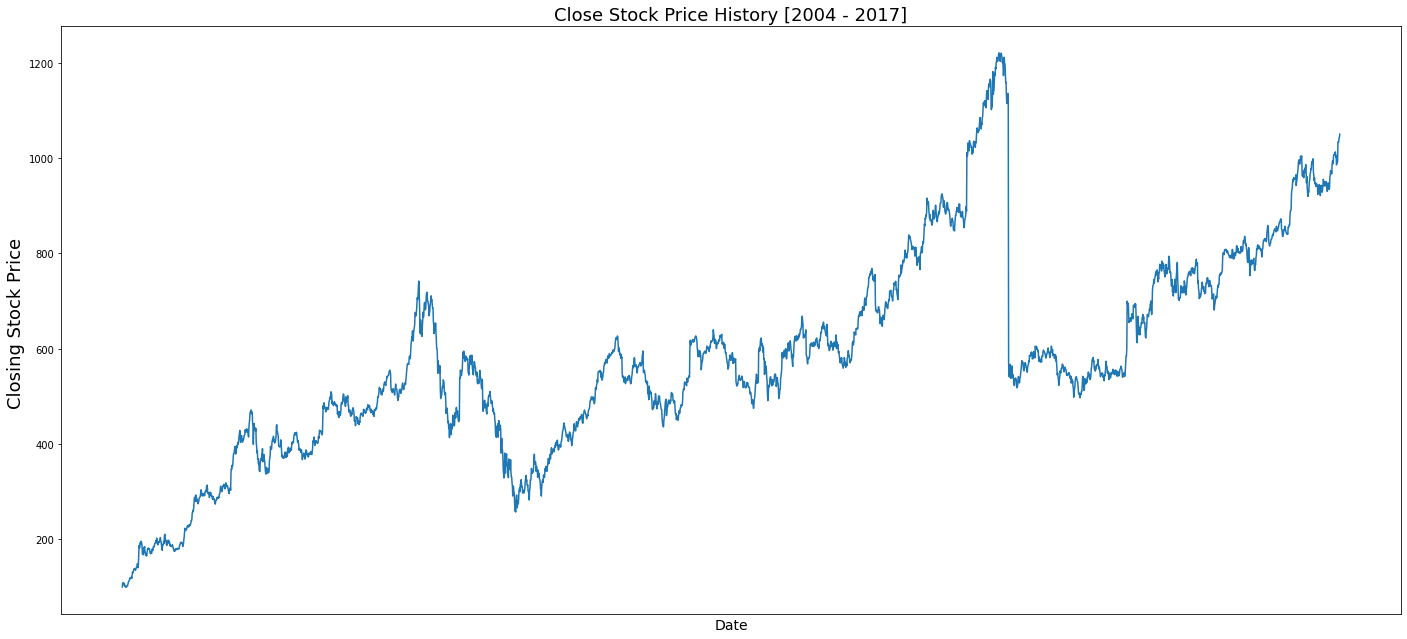

In [15]:
import matplotlib.dates as mdates

years = mdates.YearLocator() # Get every year
yearsFmt = mdates.DateFormatter('%Y') # Set year format

# Create subplots to plot graph and control axes
fig, ax = plt.subplots(figsize=(24,12))

ax.plot(df['Date'], df['Close'])

# Format the ticks
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)

# plt.figure(figsize=(12, 12))
# Set figure title
plt.title('Close Stock Price History [2004 - 2017]', fontsize=18)
# Set x label
plt.xlabel('Date', fontsize=14)
# Set y label
plt.ylabel('Closing Stock Price ', fontsize=18)

# Rotate and align the x labels
fig.autofmt_xdate()

# Show plot
plt.show()

# Plotting heatmap for correlation between all the columns in the table

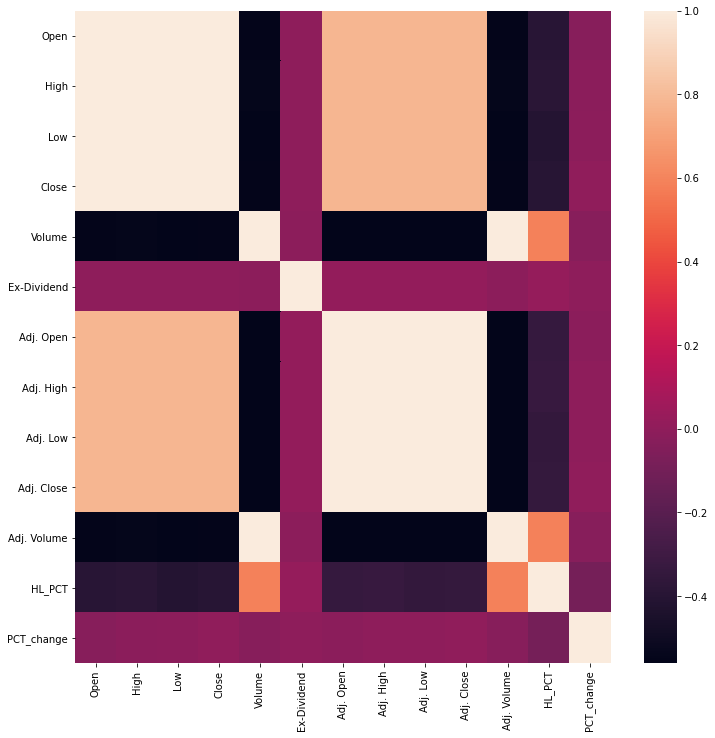

In [16]:
data_copy=data.copy()
data_copy.drop(['Split Ratio'],axis=1,inplace=True)
plt.subplots(figsize=(12,12))
sns.heatmap(data_copy.corr())


In [17]:
displayedClose = list()
count = 0
for i in data_copy['Close']:
  if count == 125 or count == 0:
    displayedClose.append(i)
    count = 1
  count += 1
print(displayedClose)

[100.335, 195.23, 289.721, 358.77, 381.0, 471.48, 503.0, 564.3, 483.11, 323.87, 437.342, 580.41, 466.18, 616.87, 534.01, 650.02, 595.92, 723.67, 882.31, 1118.4, 584.77, 532.3, 559.68, 776.59, 732.19, 809.45, 970.12]


# Normalizing all the columns

In [18]:
for column in data.columns:
    data[column] = data[column]  / data[column].abs().max()

In [19]:
data

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,HL_PCT,PCT_change
Date,,,,,,,,,,,,,,
2004-08-19,0.081521,0.084679,0.078746,0.082230,0.543620,0.0,1.0,0.048103,0.049069,0.046382,0.047927,0.543620,0.495920,0.035400
2004-08-20,0.082336,0.088764,0.082472,0.088766,0.277955,0.0,1.0,0.048584,0.051436,0.048577,0.051736,0.277955,0.486629,0.787277
2004-08-23,0.090284,0.092344,0.089488,0.089660,0.222226,0.0,1.0,0.053274,0.053511,0.052709,0.052257,0.222226,0.248751,-0.133760
2004-08-24,0.090675,0.090814,0.084991,0.085947,0.185601,0.0,1.0,0.053505,0.052625,0.050061,0.050093,0.185601,0.470374,-0.623803
2004-08-25,0.085393,0.087885,0.085245,0.086873,0.111850,0.0,1.0,0.050388,0.050927,0.050210,0.050633,0.111850,0.238765,0.128942
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-10-30,0.838898,0.846161,0.838938,0.846710,0.027332,0.0,1.0,0.986967,0.977633,0.985236,0.983943,0.027332,0.104055,0.042022
2017-10-31,0.842028,0.847113,0.842196,0.846636,0.018145,0.0,1.0,0.990650,0.978733,0.989062,0.983857,0.018145,0.087414,0.000422
2017-11-01,0.844734,0.852695,0.848515,0.854471,0.025632,0.0,1.0,0.993834,0.985183,0.996482,0.992962,0.025632,0.081663,0.066014


# Splitting data for training and testing

In [20]:
x = data[['Adj. Close',	'Adj. Volume',	'HL_PCT',	'PCT_change']]
y = data['Close']

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.3)

In [22]:
x_test.sort_index(inplace=True)
y_test.sort_index(inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


# Linear Regression Scores on training and testing data

In [23]:
Lreg = LinearRegression().fit(x_train, y_train)
print(Lreg.score(x_train, y_train))
print(Lreg.score(x_test, y_test))

0.6341479419607163
0.646145965026782


In [24]:
y_pred = Lreg.predict(x_test)
import math
from sklearn.metrics import mean_squared_error ,r2_score
print("mean squared error MSE %.2f" %mean_squared_error(y_test,y_pred))
print("root mean RMSE %.2f" % math.sqrt(mean_squared_error(y_test,y_pred)))
print("mean RMSE %.5f" % r2_score(y_test,y_pred))

mean squared error MSE 0.01
root mean RMSE 0.11
mean RMSE 0.64615


In [25]:
displayedDate = list()
count = 0
for i in data.index:
  if count == 125 or count == 0:
    i = datetime.date(i)
    displayedDate.append(i)
    count = 1
  count += 1
print(displayedDate)

[datetime.date(2004, 8, 19), datetime.date(2005, 2, 15), datetime.date(2005, 8, 12), datetime.date(2006, 2, 9), datetime.date(2006, 8, 8), datetime.date(2007, 2, 6), datetime.date(2007, 8, 3), datetime.date(2008, 1, 31), datetime.date(2008, 7, 29), datetime.date(2009, 1, 26), datetime.date(2009, 7, 23), datetime.date(2010, 1, 20), datetime.date(2010, 7, 19), datetime.date(2011, 1, 12), datetime.date(2011, 7, 12), datetime.date(2012, 1, 6), datetime.date(2012, 7, 5), datetime.date(2013, 1, 3), datetime.date(2013, 7, 2), datetime.date(2013, 12, 27), datetime.date(2014, 6, 26), datetime.date(2014, 12, 22), datetime.date(2015, 6, 22), datetime.date(2015, 12, 16), datetime.date(2016, 6, 15), datetime.date(2016, 12, 9), datetime.date(2017, 6, 9)]


# Plotting the Linear Regression line on the stock price graph using _sns regplot_

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


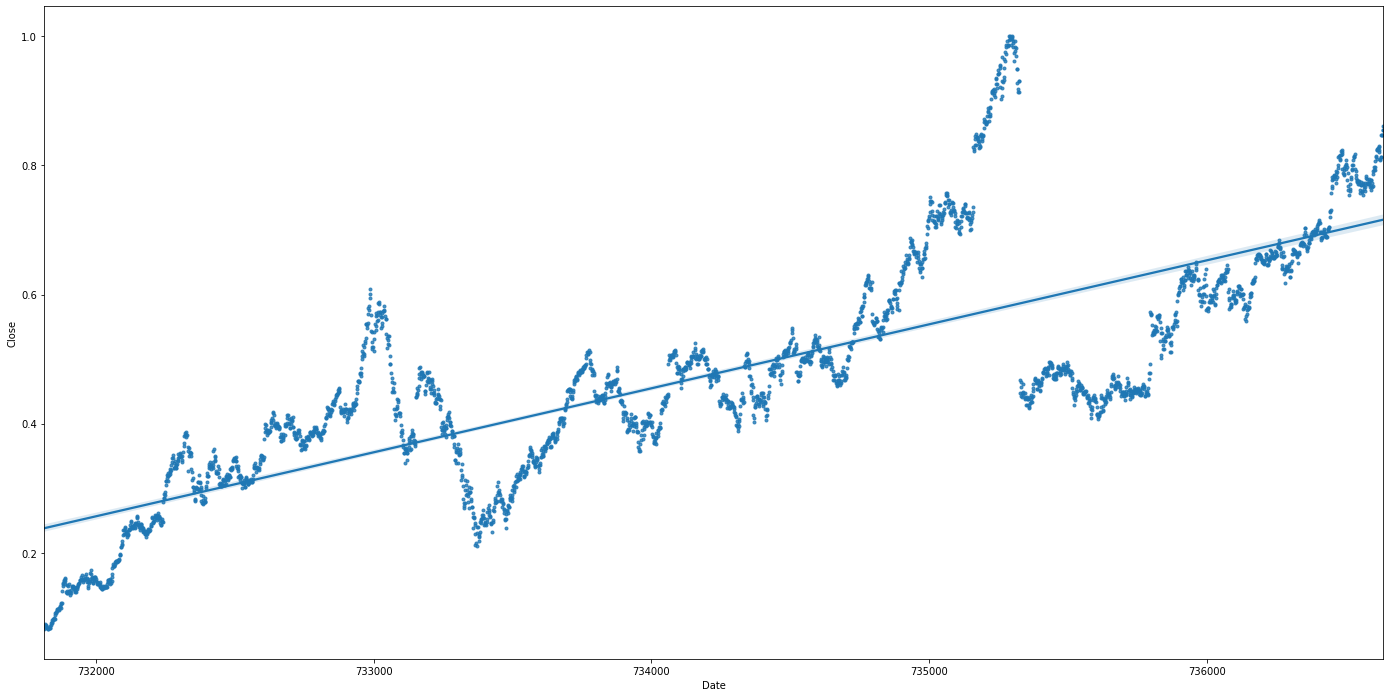

In [26]:
plt.figure(figsize=(24, 12))
# plt.scatter(data.index, data['Close'], s=1, color='red')
# plt.plot(x_test.index, y_pred, color='blue')
sns.regplot(data.index.map(dt.datetime.toordinal), data['Close'] ,marker=".")

# Plotting the Linear Regression line on the stock price graph using _custom linear regression_

In [27]:
train, test = train_test_split(df, test_size=0.20)

In [28]:
X_train_self = np.array(train.index).reshape(-1, 1)
y_train_self = train['Close']

In [29]:
model = LinearRegression()
# Fit linear model using the train data set
model.fit(X_train_self, y_train_self)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

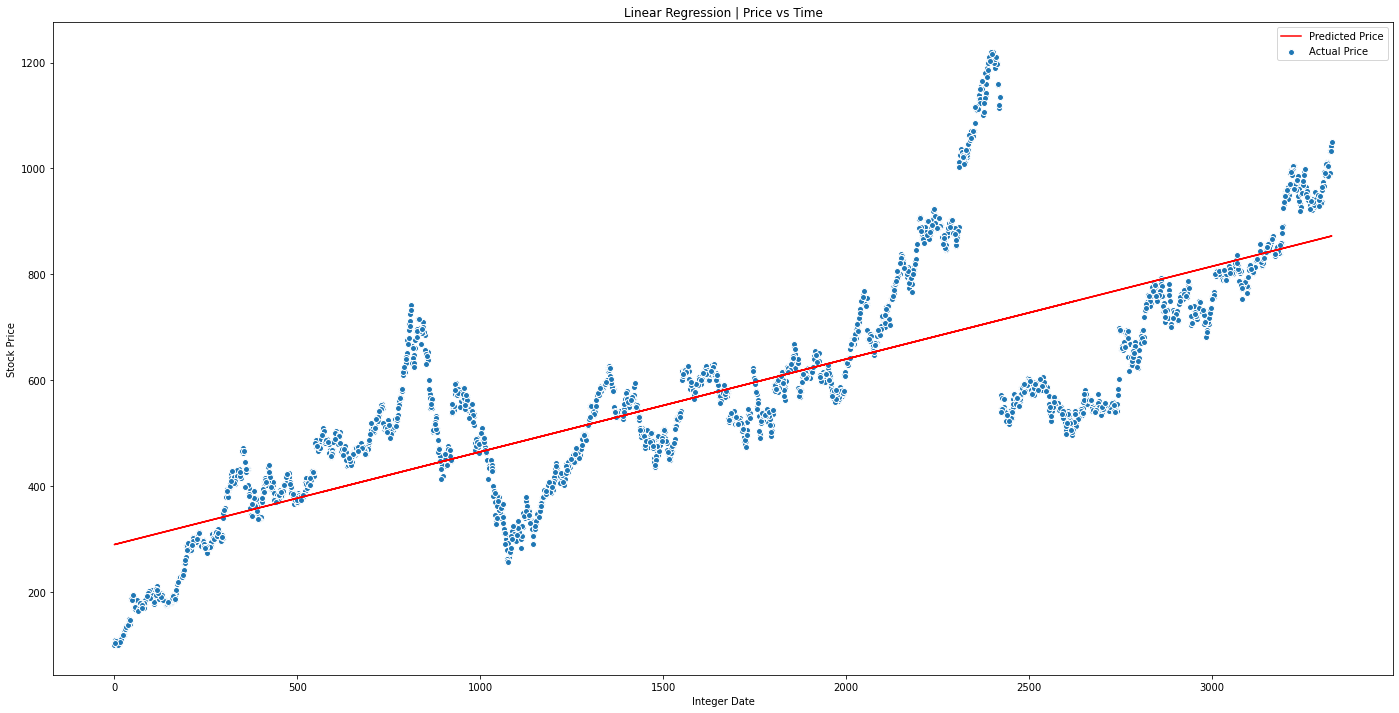

In [30]:
plt.figure(1, figsize=(24,12))
plt.title('Linear Regression | Price vs Time')
plt.scatter(X_train_self, y_train_self, edgecolor='w', label='Actual Price')
plt.plot(X_train_self, model.predict(X_train_self), color='r', label='Predicted Price')
plt.xlabel('Integer Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

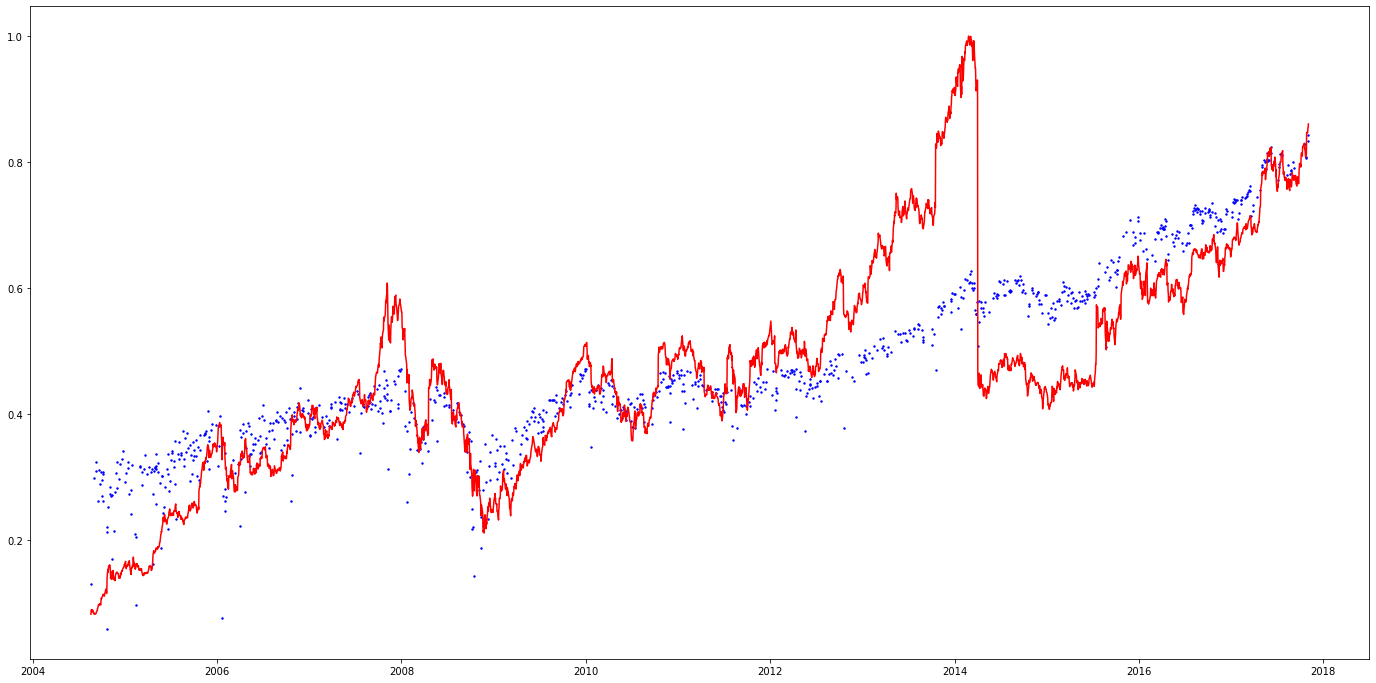

In [31]:
plt.figure(figsize=(24, 12))
plt.plot(data.index, data['Close'], color='red')
plt.scatter(x_test.index, y_pred, s=2,  color='blue')
# plt.plot(testing.index, y_pred_test, color='green')

# Loading unseen testing data

In [32]:
testing = quandl.get("WIKI/GOOGL", start_date="2017-10-28", end_date="2018-03-27")

In [33]:
testing

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2017-10-30,1029.16,1039.83,1022.33,1033.13,2245352.0,0.0,1.0,1029.16,1039.83,1022.33,1033.13,2245352.0
2017-10-31,1033.00,1041.00,1026.30,1033.04,1490660.0,0.0,1.0,1033.00,1041.00,1026.30,1033.04,1490660.0
2017-11-01,1036.32,1047.86,1034.00,1042.60,2105729.0,0.0,1.0,1036.32,1047.86,1034.00,1042.60,2105729.0
2017-11-02,1039.99,1045.52,1028.66,1042.97,1233333.0,0.0,1.0,1039.99,1045.52,1028.66,1042.97,1233333.0
2017-11-03,1042.75,1050.66,1037.65,1049.99,1370874.0,0.0,1.0,1042.75,1050.66,1037.65,1049.99,1370874.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-03-21,1092.57,1108.70,1087.21,1094.00,1990515.0,0.0,1.0,1092.57,1108.70,1087.21,1094.00,1990515.0
2018-03-22,1080.01,1083.92,1049.64,1053.15,3418154.0,0.0,1.0,1080.01,1083.92,1049.64,1053.15,3418154.0
2018-03-23,1051.37,1066.78,1024.87,1026.55,2413517.0,0.0,1.0,1051.37,1066.78,1024.87,1026.55,2413517.0


In [34]:
testing['HL_PCT'] = (testing['Adj. High'] - testing['Adj. Low']) * 100 / testing['Adj. Close']
testing['PCT_change'] = (testing['Adj. Close'] - testing['Adj. Open']) * 100 / testing['Adj. Open']
for column in testing.columns:
    testing[column] = testing[column]  / testing[column].abs().max()
y_pred_test = Lreg.predict(testing[['Adj. Close', 'HL_PCT', 'PCT_change','Adj. Volume']])
y_test_test = testing['Close']
# print(y_test_test, y_pred)
import math
from sklearn.metrics import mean_squared_error ,r2_score
print("mean squared error MSE %.2f" %mean_squared_error(y_test_test,y_pred_test))
print("root mean RMSE %.2f" % math.sqrt(mean_squared_error(y_test_test,y_pred_test)))
print("mean RMSE %.5f" % r2_score(y_test_test,y_pred_test))


mean squared error MSE 0.03
root mean RMSE 0.17
mean RMSE -16.81856


# Plotting future prediction value of stocks

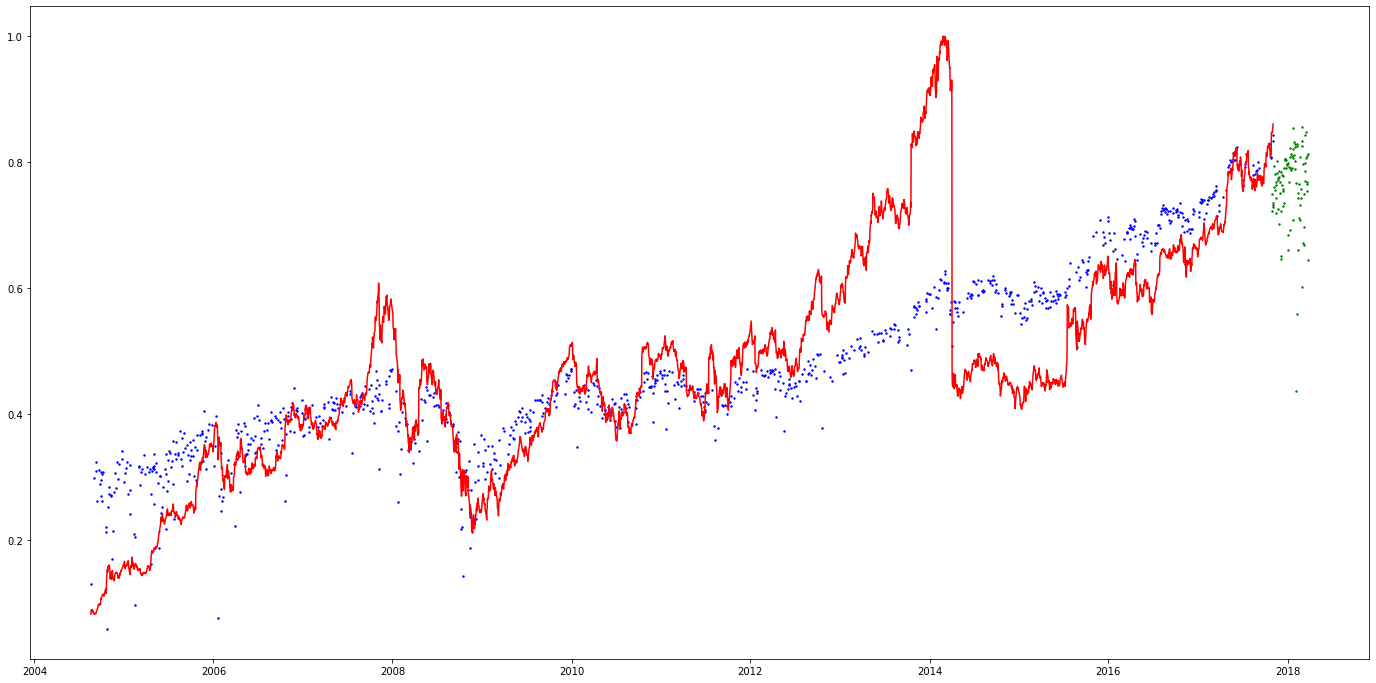

In [35]:
# for column in data.columns:
#     data[column] = data[column]  * 100 / data[column].abs().min()

# for column in testing.columns:
#     testing[column] = testing[column] * 100 / testing[column].abs().min()
plt.figure(figsize=(24, 12))
plt.plot(data.index, data['Close'], color='red')
plt.scatter(x_test.index, y_pred, s=2,  color='blue')
plt.scatter(testing.index, y_pred_test, s=2, color='green')
# plt.plot(testing.index, y_test_test)

# Comparing some predicted values and actual values using bar plot

In [43]:
X_test_self = np.array(test.index).reshape(-1, 1)
y_test_self = test['Close']
model.score(X_test_self, y_test_self)

0.6013053068893977

In [44]:
y_pred_train = model.predict(X_test_self)

In [46]:
y_pred_train.shape

(666,)

In [47]:
randints = np.random.randint(2550, size=25)

# Select row numbers == random numbers
df_sample = df[df.index.isin(randints)]
df_sample['Prediction'] = y_pred_train[:25]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


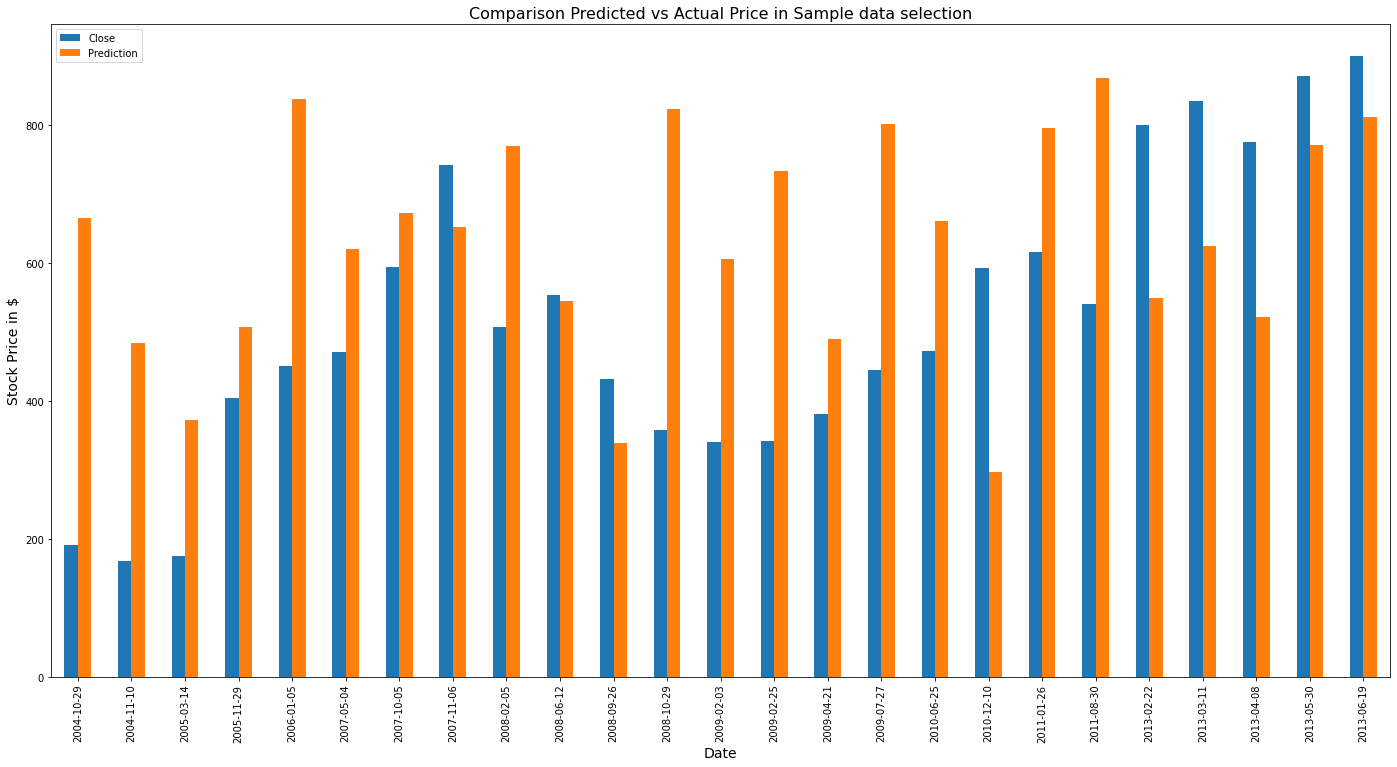

In [48]:
# Create subplots to plot graph and control axes
fig, ax = plt.subplots(figsize=(24, 12))
df_sample.plot(x='Date', y=['Close', 'Prediction'], kind='bar', ax=ax)

# Set figure title
plt.title('Comparison Predicted vs Actual Price in Sample data selection', fontsize=16)

# 

# Set x label
plt.xlabel('Date', fontsize=14)

# Set y label
plt.ylabel('Stock Price in $', fontsize=14)

# Show plot
plt.show()

# KNN

In [60]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors = 3)
knn.fit(x_train,y_train)

# knn.predict(x_test).shape

,Adj. Close,Adj. Volume,HL_PCT,PCT_change
Date,,,,
2004-08-19,0.047927,0.543620,0.495920,0.035400
2004-08-30,0.048727,0.063258,0.209563,-0.338354
2004-09-07,0.048522,0.071180,0.144534,0.061472
2004-09-09,0.048870,0.049442,0.102673,-0.020193
2004-09-14,0.053255,0.131817,0.287065,0.410637
...,...,...,...,...
2017-10-20,0.957219,0.019092,0.038994,-0.021418
2017-10-25,0.944257,0.016653,0.103521,0.057325
2017-10-26,0.944219,0.022248,0.099386,-0.076917


In [50]:
knn.score(x_train,y_train)

0.9548698769536313

In [51]:
knn.score(x_test, y_test)

0.8844288064491842

In [62]:
y_pred_knn = knn.predict(testing[['Adj. Close', 'HL_PCT', 'PCT_change','Adj. Volume']])

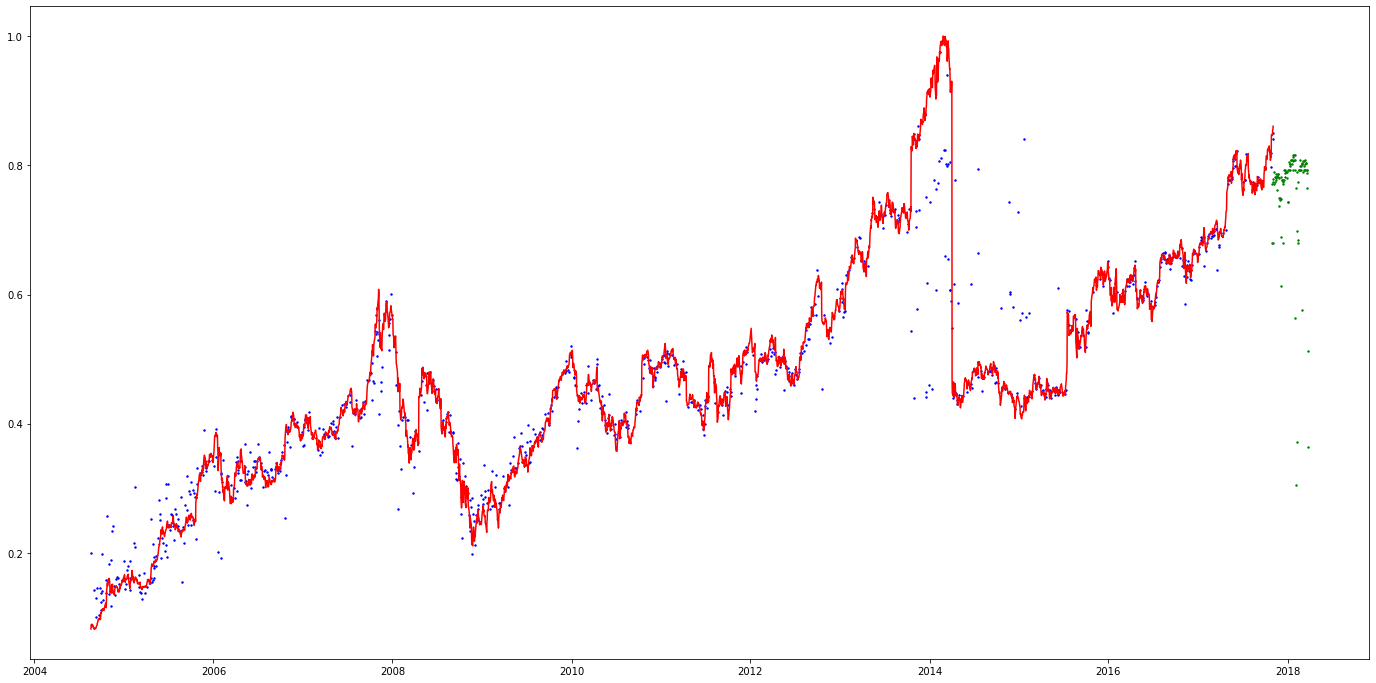

In [64]:
plt.figure(figsize=(24, 12))
plt.plot(data.index, data['Close'], color='red')
# plt.scatter(x_test.index, y_pred, s=2,  color='blue')
plt.scatter(x_test.index, knn.predict(x_test), s=2, color='blue')
plt.scatter(testing.index, y_pred_knn, s=2, color='green')
# plt.plot(testing.index, y_test_test)

# Desicion Tree Regressor

In [69]:
from sklearn.tree import DecisionTreeRegressor
best_score = 0

for depth in range(2,10):
    for split in range(2,5):
        for leaf in range(5,20):
            tree_grid_search = DecisionTreeRegressor(
                                                      max_depth = depth,
                                                      min_samples_split = split,
                                                      max_leaf_nodes= leaf)
            tree_grid_search.fit(x_train,y_train)
            
            
            test_score = tree_grid_search.score(x_test,y_test)
            train_score = tree_grid_search.score(x_train,y_train)
#                 parameters = {'Depth':depth,
#                               'Split':split,
#                               'Leaves':leaf,
#                               'Criterion':criteria}
#                 print("Parameters = ",parameters)
            if test_score > best_score:
                best_score = test_score
                best_parameters = {'Depth':depth,
                                  'Split':split,
                                  'Leaves':leaf,
                                  'Criterion':criteria}
print("Best Score: "+str(best_score))
print("Best Parameters: "+str(best_parameters))

Best Score: 0.9070685107915238
Best Parameters: {'Depth': 9, 'Split': 2, 'Leaves': 19, 'Criterion': 'entropy'}


In [72]:
from sklearn.model_selection import GridSearchCV
depth = list(range(2,10))
split = list(range(2,5))
leaf = list(range(5,20))

param_grid = {'max_depth':depth,
             'min_samples_split':split,
             'max_leaf_nodes':leaf}

tree_grid_cv = DecisionTreeRegressor()

grid_search = GridSearchCV(tree_grid_cv , param_grid,cv=5)

grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9],
                         'max_leaf_nodes': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
            

In [73]:
print("Test acc: "+str(grid_search.score(x_test,y_test)))

Test acc: 0.9009762630198664


In [74]:
print("Best parameter :" +str(grid_search.best_params_))
print("Best score: "+str(grid_search.best_score_))

Best parameter :{'max_depth': 8, 'max_leaf_nodes': 17, 'min_samples_split': 2}
Best score: 0.8852220295529396
